In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *

import uproot4 as up

center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }



# double thmax(double *x, double *par) {
#    double s,y;
#   s= 222.947-505.444*x[0] + 534.834*x[0]*x[0]-223.395*x[0]*x[0]*x[0];
#    return s;
# }


# double th_s1_up1(double *x, double *par) {
#    double s;

#  s=(304.23*(x[0]+0.15)*(x[0]+0.15)*(x[0]+0.15) -255.798*(x[0]+0.15)*(x[0]+0.15)+497.462*(x[0]+0.15) +38.0385)*exp(-1.85*(x[0]+0.15)) +5.5;
   
#    return s;
# }

# double th_s1_down1(double *x, double *par) {
#    double s;

#  s=(304.23*(x[0]+0.15)*(x[0]+0.15)*(x[0]+0.15) -255.798*(x[0]+0.15)*(x[0]+0.15)+497.462*(x[0]+0.15) +38.0385)*exp(-1.85*(x[0]+0.15)) -3;
   
#    return s;
# }

# double th_s1_down2(double *x, double *par) {
#    double s;

#  s=(pow((x[0]-0.103718),(0.0703664))*252.822-133.024)*exp(-0.5*x[0])+0.1;
   
#    return s;
# }

# double th_s1_up2(double *x, double *par) {
#    double s;

#  s=(pow((x[0]-0.0575818),( 0.075643))*238.248-115.039)*exp(-0.5*x[0])-0.1;
   
#    return s;
# }

# double th_s1_up3(double *x, double *par) {
#    double s,y;

# y=x[0]+0.25;

#  s=(304.23*y*y*y -255.798*y*y+497.462*y +38.0385)*exp(-1.6*y)-104;
   
#    return s;
# }
# double th_s1_down3(double *x, double *par) {
#    double s,y;

# y=x[0]-0.12;

#  s=(304.23*y*y*y -255.798*y*y+497.462*y +38.0385)*exp(-1.6*y)-103;
   
#    return s;
# }
# ///-----------------------


# double th_s2_up1(double *x, double *par) {
#    double s;

#  s=pow((x[0]-0.415068),(0.226449))*48.7564 + 2.79478-1.;
   
#    return s;
# }

# double th_s2_down1(double *x, double *par) {
#    double s;

#  s=pow((x[0]-0.449975),( 0.315164 ))*36.608 +  9.74262-1.;
   
#    return s;
# }

# double th_s2_up2(double *x, double *par) {
#    double s;

#  s=(387.289*x[0]*x[0]*x[0] -758.466*x[0]*x[0]+ 842.881*x[0]-299.953+15.)*exp(-2*x[0]);
   
#    return s;
# }

# double th_s2_down2(double *x, double *par) {
#    double s,y;
# y=x[0]+0.03;


#  s=(387.289*y*y*y -758.466*y*y+ 842.881*y-299.953-15.)*exp(-2*y)-1.5;
#    return s;
# }
# //---------------------------------

# double th_s3_up1(double *x, double *par) {
#    double s;

#  s=(10000*x[0]*x[0]*x[0]-3607.41*x[0]*x[0]+ 1725.72*x[0]-10.6776)*exp(-4.7*x[0]);
   
#    return s;
# }

# double th_s3_down1(double *x, double *par) {
#    double s;

#  s=(10000*x[0]*x[0]*x[0]-4505.62*x[0]*x[0]+  2056.24  *x[0] -77.4077 +5.)*exp(-4.7*x[0]);
   
#    return s;
# }

# double th_s3_up2(double *x, double *par) {
#    double s;

#  s=pow((x[0]-0.416536),(0.108376))*67.4593-21.4374;
 
#    return s;
# }

# double th_s3_down2(double *x, double *par) {
#    double s;

#  s=pow((x[0] -0.454898),( 0.289291))* 35.7267+6.65908+1.5;
   
#    return s;
# }
# //-----------------------------------

# double th_s4_up1(double *x, double *par) {
#    double s,y;

# y=x[0]+0.165;

#  s=(304.23*y*y*y -255.798*y*y+497.462*y +38.0385)*exp(-1.85*y) +5.;
   
#    return s;
# }

# double th_s4_down1(double *x, double *par) {
#    double s;

#  s=(304.23*(x[0]+0.18)*(x[0]+0.18)*(x[0]+0.18) -255.798*(x[0]+0.18)*(x[0]+0.18)+497.462*(x[0]+0.18) +38.0385)*exp(-1.85*(x[0]+0.18)) - 1.;
   
#    return s;
# }

# double th_s4_up2(double *x, double *par) {
#    double s;

#  s=(1600*(x[0]+0.03)*(x[0]+0.03)*(x[0]+0.03) -1068.36*(x[0]+0.03)*(x[0]+0.03)+ 775.016*(x[0]+0.03)-1.13034)*exp(-2.75*(x[0]+0.03));
   
#    return s;
# }

# double th_s4_down2(double *x, double *par) {
#    double s;

#  s=(pow((x[0]-0.103718),(0.0703664))*252.822-133.024)*exp(-0.45*x[0])-7.;
   
#    return s;
# }

# double th_s5_up1(double *x, double *par) {
#    double s;

#  s=(525.498*(x[0]+0.03)*(x[0]+0.03)*(x[0]+0.03) -1284.98*(x[0]+0.03)*(x[0]+0.03)+1460.67*(x[0]+0.03)-499.999)*exp(-1.94*(x[0]+0.03));
   
#    return s;
# }

# double th_s5_down1(double *x, double *par) {
#    double s;

#  s=(525.498*(x[0]-0.02)*(x[0]-0.02)*(x[0]-0.02) -1284.98*(x[0]-0.02)*(x[0]-0.02)+1460.67*(x[0]-0.02)-499.999)*exp(-1.94*(x[0]-0.02)) -4.7;
   
#    return s;
# }


# double th_s5_up2(double *x, double *par) {
#    double s;

#  s=(304.23*(x[0])*(x[0])*(x[0]) -255.798*(x[0])*(x[0])+497.462*(x[0]) +38.0385)*exp(-1.85*(x[0]));
   
#    return s;
# }

# double th_s5_down2(double *x, double *par) {
#    double s;

#  s=(304.23*(x[0]+0.03)*(x[0]+0.03)*(x[0]+0.03) -255.798*(x[0]+0.03)*(x[0]+0.03)+497.462*(x[0]+0.03) +38.0385)*exp(-1.85*(x[0]+0.03)) -11.;
   
#    return s;
# }

# double th_s5_up3(double *x, double *par) {
#    double s;
#  s=pow((x[0]-0.304992),(0.0758186))*91.5643-48.2057 - 1.;
#   return s;
# }

# double th_s5_down3(double *x, double *par) {
#    double s;

#  s=pow((x[0] -0.36848),( 0.0864219))*70.4769  -34.9998+ 1.5;
   
#    return s;
# }

# double th_s6_up1(double *x, double *par) {
#    double s;
#  s=pow((x[0]-0.05-0.0942469),( 0.0582707))*114.358-50 -0.5;
#   return s;
# }

# double th_s6_down1(double *x, double *par) {
#    double s;
#  s=pow((x[0]-0.05-0.126994),( 0.0706829))* 110.073-50+2.;
#   return s;
# }

# double th_s6_down2(double *x, double *par) {
#    double s;
#  s=pow((x[0] -0.454098),(0.0912936))*58.2946-20.4843+1.5;
#   return s;
# }

# double th_s6_up2(double *x, double *par) {
#    double s;
#  s=pow((x[0]-0.416536),(0.108376))*67.4593-21.4374-1.;
#   return s;
# }






In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi,pip_theta_star,pip_phi_star
0,4,3.213558,0.278350,-1.539040,1,0.534200,0.403637,1.882262,0.411152,0.920736
1,3,3.444236,0.328218,-0.507874,6,1.357594,0.511178,2.378977,0.564268,5.488275
2,6,2.939463,0.339115,2.657549,1,0.588493,0.316035,1.681328,1.691769,0.426210
3,4,3.123664,0.383672,-1.526593,6,0.660290,0.698640,2.481482,1.581153,1.484423
4,4,2.088481,0.559429,-1.886676,1,1.908428,0.606341,1.326355,0.982320,2.982355


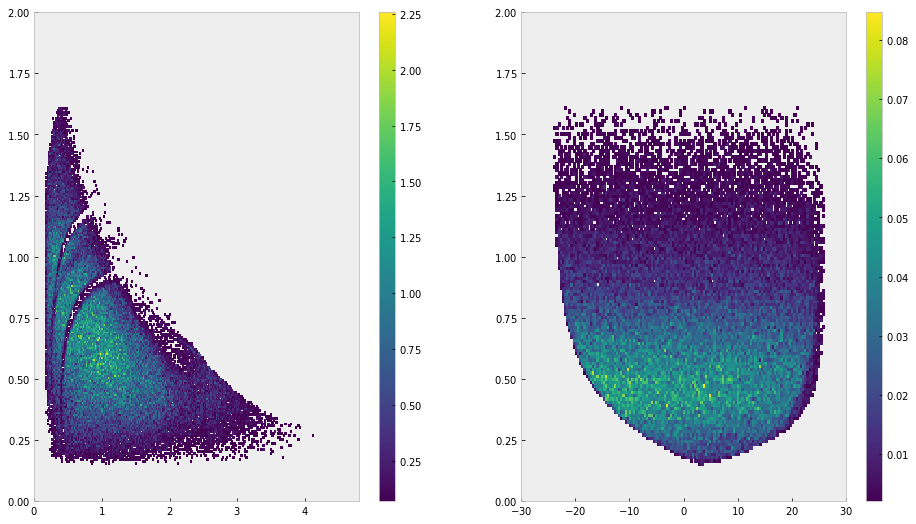

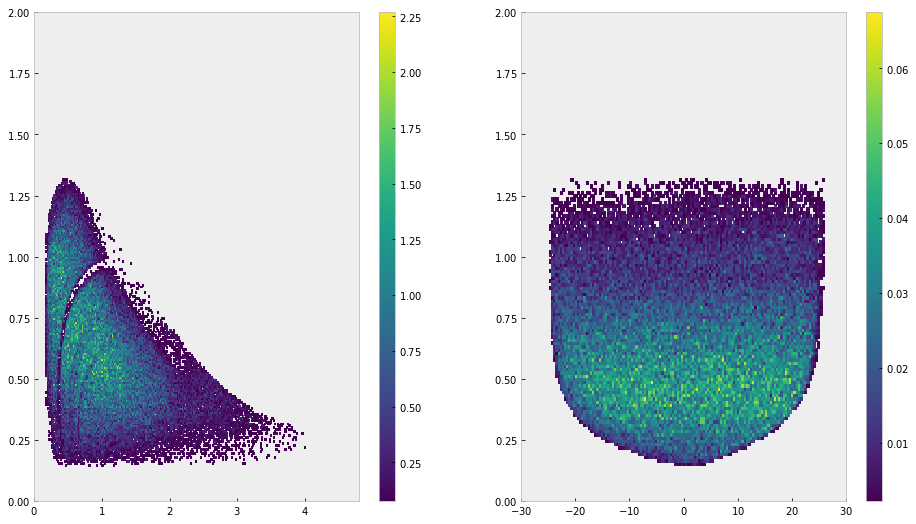

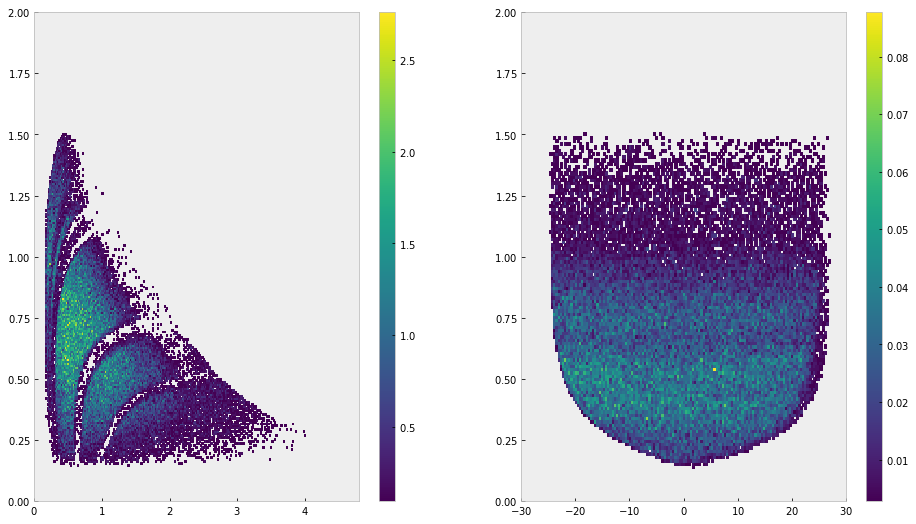

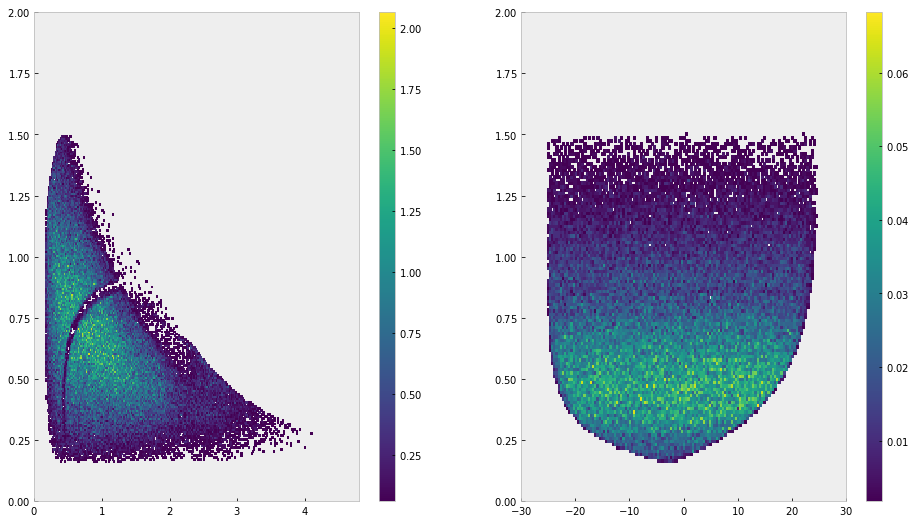

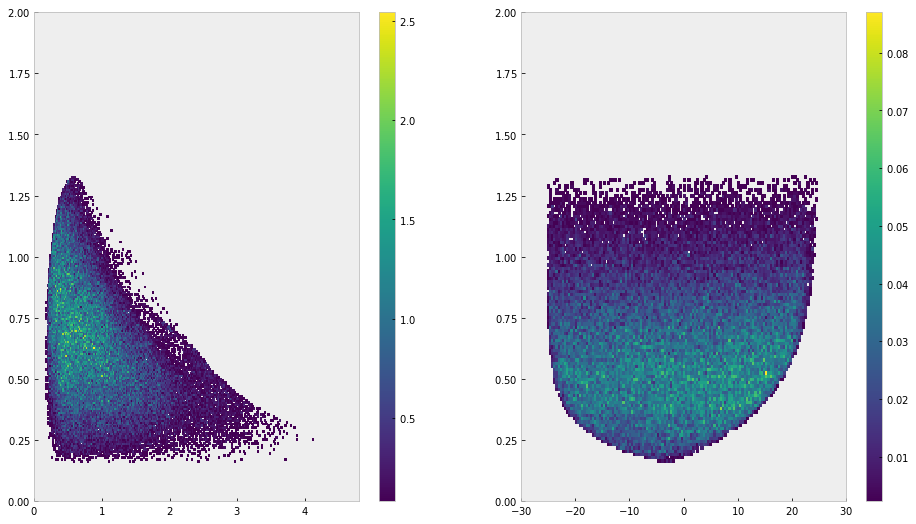

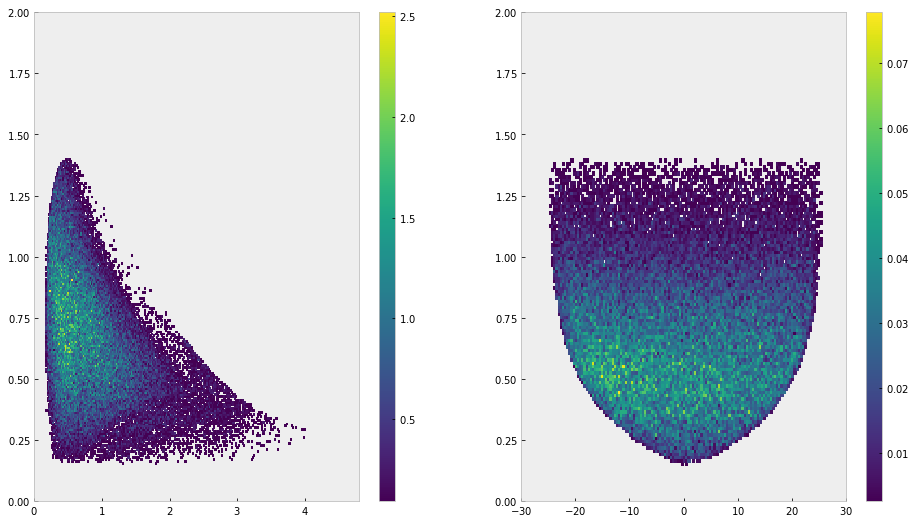

In [4]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    # _df = df[df.pip_sector == sec]
    _df = df[(df.pip_sector == sec)]
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.pip_phi)+center_phi[sec], ydata=_df.pip_theta, 
                        xbins=150, ybins=150, xrange=[-30,30], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

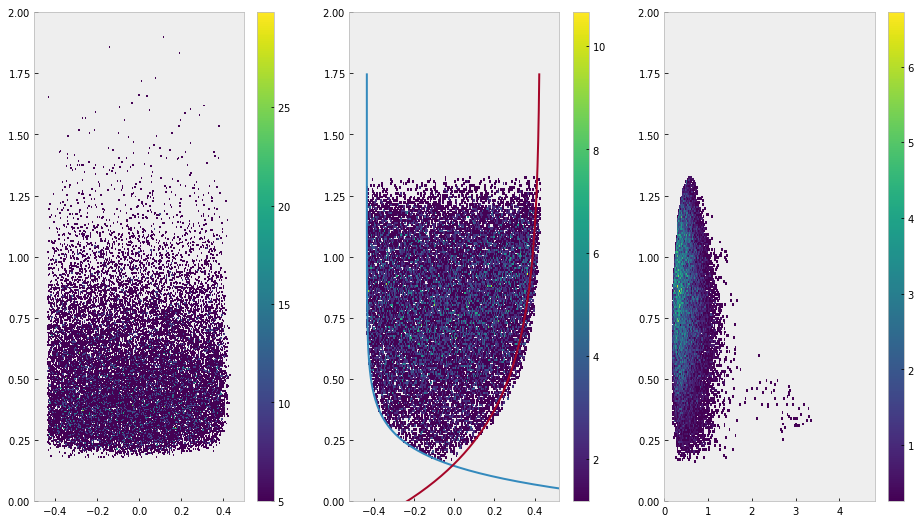

In [5]:

sec = 5

thetas = np.linspace(-30, 100, 200)
phis = np.linspace(0, 1, 200)


a0mh = [25.0, 25.5, 25.5, 26, 26, 26]
a1mh = [0.07, 0.14, 0.11, 0.14, 0.15, 0.07]
a2mh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3mh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

a0xh = [25.0, 25.0, 26.0, 24, 25.5, 25]
a1xh = [0.14, 0.11, 0.13, 0.07, 0.05, 0.07]
a2xh = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
a3xh = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

def hadron_fid_phi_m(theta, sec):
    sec = sec - 1
    return (a0xh[sec] * (1.0 - np.exp(-a1xh[sec] * (theta - a2xh[sec]))) - a3xh[sec])

def hadron_fid_phi_x(theta, sec):
    sec = sec - 1
    return -1*(a0mh[sec] * (1.0 - np.exp(-a1mh[sec] * (theta - a2mh[sec]))) - a3mh[sec])



for sec in [5]:
# for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[16,9])
    ax[1].plot(np.deg2rad(hadron_fid_phi_x(thetas, sec)), np.deg2rad(thetas))
    ax[1].plot(np.deg2rad(hadron_fid_phi_m(thetas, sec)), np.deg2rad(thetas))


    _df = df[(df.pip_sector == sec) & (np.cos(df.pip_theta_star) < 0)]
    
    # top_line = 2.0
    # bot_line = 1.35
    
    # ax[1].axhline(bot_line, lw=0.5,c='b')
    # ax[1].axhline(top_line, lw=0.5, c='r')

    # _df = _df[~((_df.pip_theta > bot_line) & (_df.pip_theta < top_line))]
    eptheta = Hist2D(ydata=_df.pip_p, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]), xbins=500, ybins=500, yrange=[0,2.0], xrange=[-0.5,0.5])
    eptheta.plot(ax[0], zeros=False)
    

    
    epphitheta = Hist2D(ydata=_df.pip_theta, xdata=_df.pip_phi+np.deg2rad(center_phi[sec]),
                        xbins=250, ybins=250, xrange=[np.deg2rad(-30),np.deg2rad(30)], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[2], zeros=False)



    ax[1].set_xlim(np.deg2rad(-30), np.deg2rad(30))
    ax[1].set_ylim(0, 2)
    plt.show()

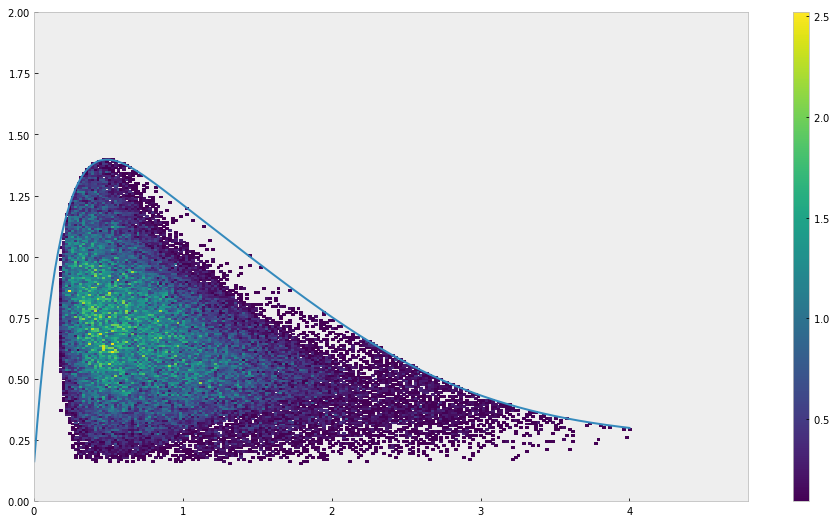

In [6]:

def bot(x, par):
    s=(np.power((x-0.103718),(0.0703664))*252.822-133.024)*np.exp(-0.5*x)+0.1
    
    return np.deg2rad(s)

def top_old(x, par):
    #s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    return np.deg2rad(s)

def top(x, par):
    #s=(np.power((x-0.0575818),(0.075643))*238.248-115.039)*np.exp(-0.5*x)-10
    s=(np.power((x-0.01),(0.08))*230-120)*np.exp(-0.5*x)-10
    return np.deg2rad(s)

def th_s1_down1(x, par):
    x = x + 0.15
    s=(304.23*x*x*x -255.798*x*x+497.462*x +38.0385)*np.exp(-1.85*x) +10
    return np.deg2rad(s)


def th_s1_up1(x, par):
    # s=(304.23*(x+0.15)*(x+0.15)*(x+0.15) -255.798*(x+0.15)*(x+0.15)+497.462*(x+0.15) +38.0385)*np.exp(-1.85*(x+0.15)) +5.5
    x = x + 0.03
    s=(300*x*x*x -300*x*x+500*x -20 )* np.exp(-2.15*x) + 14.3
    return np.deg2rad(s)


sec = 6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[16,9])
# _df = df[df.pip_sector == sec]
_df = df[(df.pip_sector == sec)]
eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
eptheta.plot(ax, zeros=False)

xs = np.linspace(0,4,200)
par = []

ax.plot(xs, th_s1_up1(xs, par))
# ax.plot(xs, th_s1_down1(xs, par))
#ax.plot(xs, top(xs, par))
#ax.plot(xs, top_old(xs, par))
# ax.plot(xs, th_s1_up2(xs, par))

ax.set_ylim(0,2)

plt.show()